<a href="https://colab.research.google.com/github/ennergarcia/customer_segmentation/blob/main/Segmentacao_clientes2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color='white'>Pré-Processamento do dados</font>

In [17]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.12.12


In [18]:
# Imports
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [19]:
# Cria o padronizador dos dados
padronizador = StandardScaler()


## ⚖️ O que o StandardScaler faz?

O **StandardScaler** é uma das ferramentas de pré-processamento de dados mais comuns e importantes em **Machine Learning**, especialmente na biblioteca Scikit-learn do Python.

Ele realiza a **padronização** (ou normalização Z-score) dos seus dados. Ele transforma cada valor na coluna para que a coluna resultante tenha:

1.  **Média igual a zero** ($\mu = 0$).
2.  **Desvio Padrão igual a um** ($\sigma = 1$).

Essa transformação garante que todas as *features* (variáveis ou colunas) contribuam de forma equivalente para o treinamento do modelo, independentemente de sua escala original.

---

## 🎯 Por Que a Padronização é Necessária?

A padronização é crucial para vários algoritmos de Machine Learning, pois resolve o problema da **diferença de escala**.

### Distância e Otimização

Muitos algoritmos funcionam calculando a distância entre os pontos de dados (como **K-Nearest Neighbors - KNN** ou **K-Means Clustering**) ou usam técnicas de otimização baseadas em gradiente (como **Regressão Linear** ou **Redes Neurais**).

* **O Problema sem Padronização:** Se uma coluna ('Renda') variar de 10.000 a 100.000, e outra ('Número de Filhos') variar de 0 a 5, a coluna com maior escala dominará o cálculo da distância.
* **A Solução:** Ao forçar todas as *features* a terem média zero e desvio padrão um, o StandardScaler assegura que **todas as dimensões estejam na mesma escala de importância**, permitindo que o modelo aprenda de forma justa a partir de todas elas.

In [20]:
# Carrega os dados
df_norm = pd.read_csv('https://raw.githubusercontent.com/ennergarcia/customer_segmentation/main/Clientes2.csv')

In [21]:
# Aplica o padronizador somente nas colunas de interesse
dados_padronizados = padronizador.fit_transform(df_norm[['idade', 'limite_credito', 'taxa_desconto']])

In [22]:
# Olhando os dados padronizados
print(dados_padronizados)

[[-0.54961498 -2.31762463  0.54647172]
 [-1.15356986 -0.26876895 -0.46023948]
 [-0.04631925 -1.07671002  0.04311612]
 ...
 [-0.34829669  1.31655643 -1.97030628]
 [ 0.25565819 -0.62353795 -0.46023948]
 [-1.65686559 -1.55474182 -0.46023948]]


K=2: Coeficiente de Silhueta = 0.2193
K=3: Coeficiente de Silhueta = 0.2221
K=4: Coeficiente de Silhueta = 0.2382
K=5: Coeficiente de Silhueta = 0.2429
K=6: Coeficiente de Silhueta = 0.2417
K=7: Coeficiente de Silhueta = 0.2428
K=8: Coeficiente de Silhueta = 0.2485
K=9: Coeficiente de Silhueta = 0.2382
K=10: Coeficiente de Silhueta = 0.2371


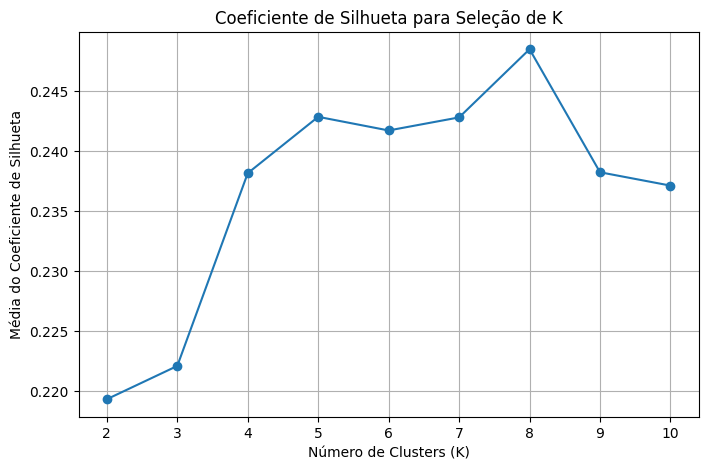

In [23]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
# Assumindo que 'dados_padronizados' já está definido e contém seus dados normalizados/escalonados.

# Não podemos calcular o Silhouette Score para K=1, então começamos em K=2
silhouette_scores = []
k_range_sil = range(2, 11) # Testar de K=2 a K=10

for k in k_range_sil:
    # 1. Aplicar K-Means (CORRIGIDO: n_init='auto' trocado por n_init=10)
    # Use n_init=10 para compatibilidade com versões mais antigas do scikit-learn.
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(dados_padronizados)

    # 2. Calcular o Coeficiente de Silhueta
    score = silhouette_score(dados_padronizados, cluster_labels)
    silhouette_scores.append(score)
    print(f"K={k}: Coeficiente de Silhueta = {score:.4f}")

# 3. Plotar o gráfico da Silhueta
plt.figure(figsize=(8, 5))
plt.plot(k_range_sil, silhouette_scores, marker='o', linestyle='-')
plt.title('Coeficiente de Silhueta para Seleção de K')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Média do Coeficiente de Silhueta')
plt.xticks(k_range_sil)
plt.grid(True)
plt.show()

# Análise do Gráfico:
# O valor ideal de K é o que corresponde ao ponto mais alto do gráfico.

## 📏 Como saber qual é a quantidade de clusters mais adequada? Um dos métodos mais utilizados é o Coeficiente de Silhueta (*Silhouette Coefficient*)

O **Coeficiente de Silhueta** (ou *Silhouette Score*) é uma métrica crucial para avaliar a **qualidade e a coesão** da clusterização (agrupamento de dados) em algoritmos de Machine Learning não supervisionado, como o K-Means.

Ele calcula, para cada ponto de dado, o quão bem ele está agrupado dentro do seu próprio cluster em comparação com outros clusters.

---

## 💡 Uso para Determinar *k*

O principal uso prático do Coeficiente de Silhueta é ajudar a escolher o **número ideal de clusters ($k$)** no K-Means.

* **Método:** Teste o algoritmo de clusterização para diferentes valores de $k$ (por exemplo, de $k=2$ até $k=10$).
* **Decisão:** O valor de $k$ que resultar no **maior Coeficiente de Silhueta médio** para o *dataset* é, geralmente, considerado o agrupamento mais eficiente e bem definido.

In [24]:
# Definimos o número de clusters (k)
k = 8

In [25]:
# Criamos o modelo K-means
kmeans = KMeans(n_clusters = k)

In [26]:
# Treinamento do modelo com os dados padronizados
kmeans.fit(dados_padronizados)

KMeans()

In [27]:
# Atribuímos os rótulos dos clusters aos clientes
df_norm['cluster'] = kmeans.labels_

In [28]:
# Exibe o resultado (10 primeiras linhas)
df_norm.head(10)

,id_cliente,idade,peso,altura,estado_civil,cidade,estado,limite_credito,taxa_desconto,tipo_cliente,cluster
0,1,34,98,184,Casado,São Paulo,RS,581,6,Diamante,1
1,2,28,105,184,Casado,São Paulo,RJ,4537,4,Ouro,1
2,3,39,44,178,Divorciado,São Paulo,RJ,2977,5,Prata,3
3,4,33,84,164,Divorciado,São Paulo,SP,7462,3,Prata,5
4,5,56,69,189,Divorciado,Rio de Janeiro,RJ,3766,3,Bronze,2
5,6,28,80,173,Casado,Rio de Janeiro,SP,8173,5,Ouro,6
6,7,53,74,177,Casado,Belo Horizonte,MG,4020,5,Prata,2
7,8,32,69,179,Solteiro,Porto Alegre,MG,4534,2,Ouro,5
8,9,18,91,185,Casado,Rio de Janeiro,RS,4956,6,Bronze,1
9,10,38,47,270,Casado,Belo Horizonte,RJ,6102,4,Prata,6


# Salvando os dados
Importante mencionar que o arquivo é salvo na máquina virtual deste notebook no caminho: /content/result_segmentos.csv.

In [29]:
# Salvamos o resultado em disco
df_norm.to_csv('result_segmentos.csv', index = False)